In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import torch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
d='cuda:0' if torch.cuda.is_available() else 'cpu'
d

'cpu'

In [ ]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df['date']= pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df1=df.loc['2014-01-01':]
df1.head(10)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-01-01,0.0,7.2,3.3,1.2,sun
2014-01-02,4.1,10.6,6.1,3.2,rain
2014-01-03,1.5,8.9,2.8,2.6,rain
2014-01-04,0.0,7.8,0.6,2.7,fog
2014-01-05,0.0,8.3,-0.5,3.7,sun
2014-01-06,0.3,7.8,-0.5,2.6,rain
2014-01-07,12.2,8.3,5.0,1.6,rain
2014-01-08,9.7,10.0,7.2,4.6,rain
2014-01-09,5.8,9.4,5.6,6.3,rain


In [ ]:
# df1['precipitation t-1']=df1.precipitation.shift(1)
# df1['precipitation t-2']=df1.precipitation.shift(2)
# df1['precipitation t-3']=df1.precipitation.shift(3)
# df1['precipitation t-4']=df1.precipitation.shift(4)
# df1['precipitation t-5']=df1.precipitation.shift(5)
# df1['precipitation t-6']=df1.precipitation.shift(6)
# df1['precipitation t-7']=df1.precipitation.shift(7)
# df1.tail()
# df1_prec=df1[7:]
# df1_prec['precipitation t-1']=df1.precipitation.shift(1)
# df1_prec.head()
df1_prec.shape[0]

722

array([[<Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'temp_max'}>],
       [<Axes: title={'center': 'temp_min'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'weather_factorized'}>, <Axes: >]],
      dtype=object)

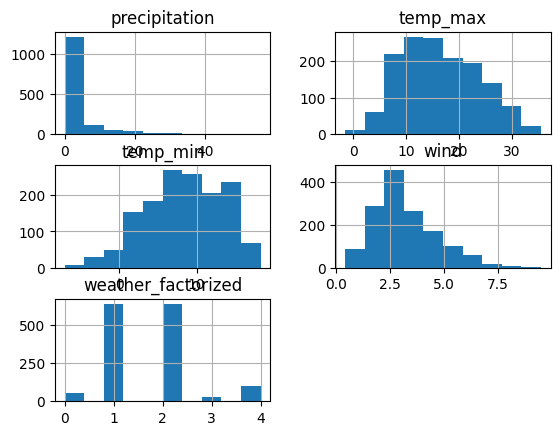

In [ ]:
df.hist()

<Axes: xlabel='date'>

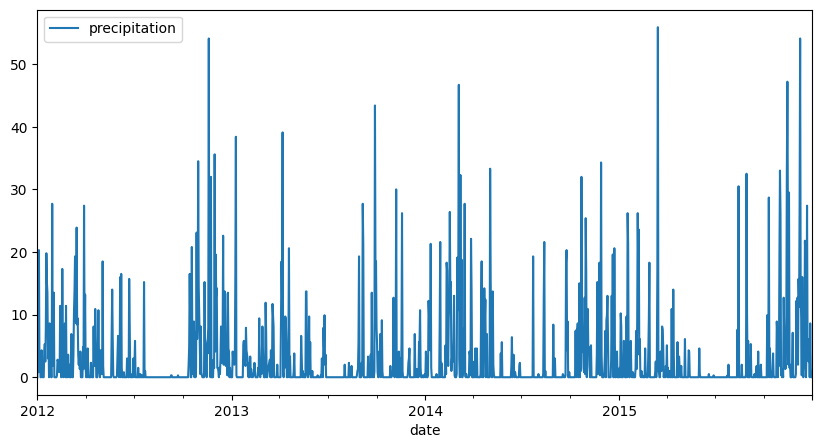

In [ ]:
df[['precipitation']].plot(figsize=(10,5),)

Text(0.5, 1.0, 'Precipitation in Seattle')

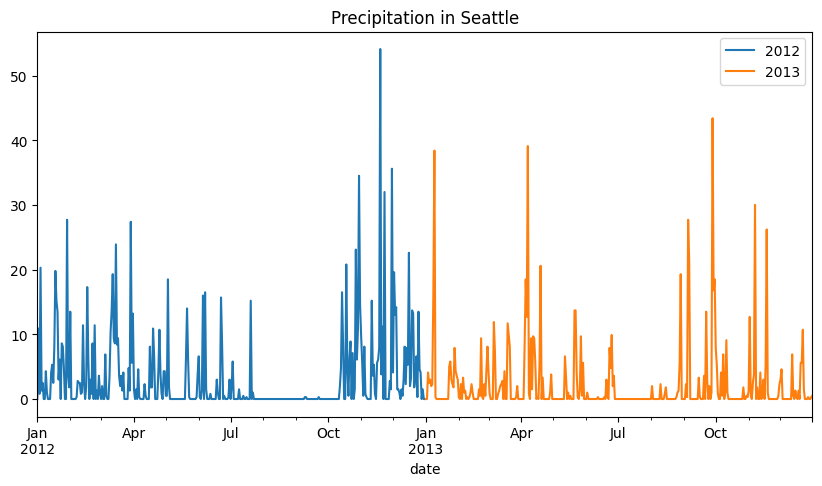

In [ ]:
prec_index=df.loc['2012-01-01':'2012-12-31'].index
prec_val=df.precipitation.loc['2012-01-01':'2012-12-31']
prec_index1=df.loc['2013-01-01':'2013-12-31'].index
prec_val1=df.precipitation.loc['2013-01-01':'2013-12-31']
figure,axis=plt.subplots(figsize=(10,5))
# sns.lineplot(x=[prec_index,prec_index1],y=[prec_val,prec_val1],ax=axis)
prec_val.plot(ax=axis)
prec_val1.plot(ax=axis)
# sns.lineplot(x=prec_index1,y=prec_val1,ax=axis)
axis.legend(['2012','2013'])
axis.set_title('Precipitation in Seattle')

<Axes: >

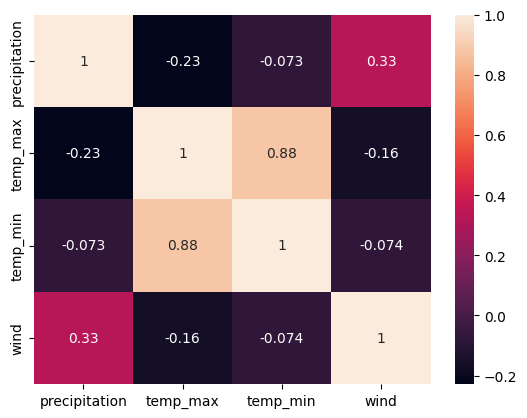

In [ ]:
sns.heatmap(df.iloc[:,:4].corr(),annot=True)

In [ ]:
df.resample(rule='A').max()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,54.1,34.4,18.3,9.5,sun
2013-12-31,43.4,33.9,18.3,8.8,sun
2014-12-31,46.7,35.6,17.8,8.8,sun
2015-12-31,55.9,35.0,18.3,8.0,sun


<Axes: xlabel='date'>

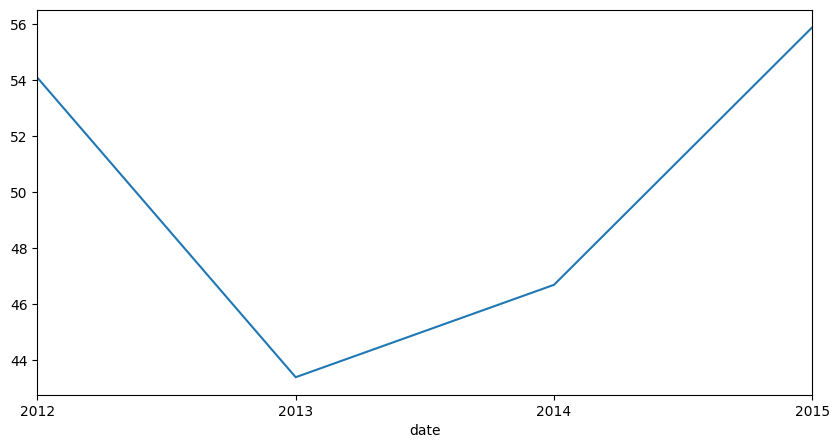

In [ ]:
df['precipitation'].resample(rule='A').max().plot(figsize=(10,5))

In [ ]:
df.resample(rule='A').min()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,0.0,-1.1,-3.3,1.0,drizzle
2013-12-31,0.0,0.0,-7.1,0.4,drizzle
2014-12-31,0.0,-1.6,-6.0,0.6,fog
2015-12-31,0.0,1.7,-3.8,0.5,drizzle


,precipitation,weather
date,,
2013-11-01,1.3,rain
2013-11-03,0.5,rain
2013-11-05,2.5,rain
2013-11-07,30.0,rain
2013-11-09,1.8,rain
2013-11-11,0.0,fog
2013-11-13,0.0,sun
2013-11-15,3.0,rain
2013-11-17,5.3,rain


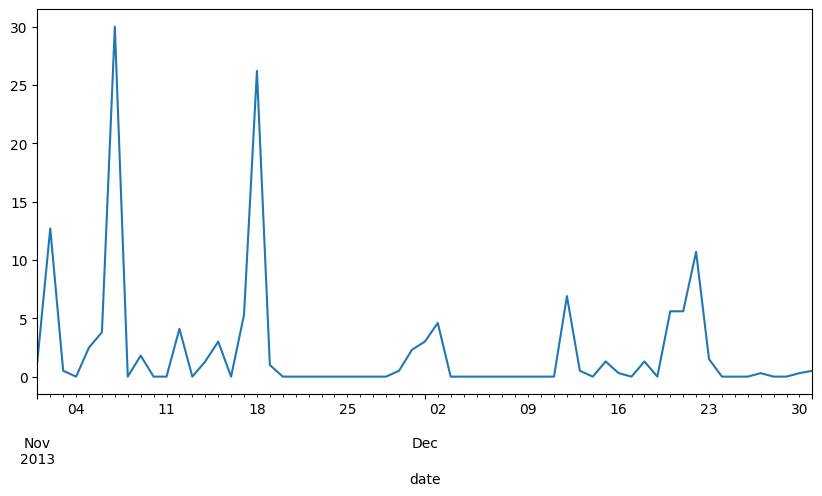

In [ ]:
df.loc['2013-11-01':'2013-12-31']['precipitation'].plot(figsize=(10,5))
# df.loc['2012-10-01':'2013-4-01']['precipitation'].plot(figsize=(10,5))
df.loc['2013-11-01':'2013-12-31':2][['precipitation','weather']]

In [ ]:
df['weather'][df.precipitation<1].value_counts()

weather
sun        640
rain       158
fog        101
drizzle     53
snow         3
Name: count, dtype: int64

The inference from this can be that when the precipitation is less that 1 the weather is more likely to be sunny. Monsoon season in Seattle was between October to April and the highest being in between November and December (where precipitation was 25+)

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('weather',axis=1)
y=df.weather
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)


0.8156996587030717

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()

param_grid={'n_estimators':[100,200,300],
            'criterion':['gini','entropy'],
            'max_features':['auto','sqrt','log2']}

grid=GridSearchCV(rfc,param_grid,cv=5,verbose=3,refit=True)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.846 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.821 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.838 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.841 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.858 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.842 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.812 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.833 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.858 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.850 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_features=auto, n_estimators=300;, score=0.833 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_features=auto, n_estimators=300;, score=0.825 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_features=auto, n_estimators=300;, score=0.850 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_features=auto, n_estimators=300;, score=0.850 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_features=auto, n_estimators=300;, score=0.854 total time=   0.7s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.846 total time=   0.2s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.829 total time=   0.2s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.838 total time=   0.2s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.867 total time=   0.2s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.854 total time=   0.3s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.850 total time=   0.6s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.825 total time=   0.7s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.842 total time=   0.7s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.854 total time=   0.7s
[CV 5/5] END criteri

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.850 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.829 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.838 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.854 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.863 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.850 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.821 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.842 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.845 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.854 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.859 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.821 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.842 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.854 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.850 total time=   0.7s
[CV 1/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.846 total time=   0.2s
[CV 2/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.838 total time=   0.2s
[CV 3/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.838 total time=   0.2s
[CV 4/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.850 total time=   0.2s
[CV 5/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.845 total time=   0.2s
[CV 1/5] END criterion=entropy, max_features=sqrt, n_estimators=200;, score=0.855 total time=   0.5s
[CV 2/5] END criterion=entropy, max_features=sqrt, n_estimators=200;, score=0.821 total time=   0.5s
[CV 3/5] END criterion=entropy, max_features=sqrt, n_estimators=200;, score=0.850 total time=   0.5s
[CV 4/5] END criterion=entropy, max_features=sqrt, n_estimators=200;, score=0.854 total tim

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
rfc=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8191126279863481

In [ ]:
rfc=RandomForestClassifier(criterion='entropy',max_features='auto',n_estimators=300)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8156996587030717

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7406143344709898

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
abc=GradientBoostingClassifier()
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8156996587030717

In [ ]:
model = GradientBoostingClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['friedman_mse','squared_error']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=3, scoring='accuracy')

grid_search.fit(x_train, y_train)
grid_search.best_params_



Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['drizzle' 'fog' 'rain' 'snow' 'sun']

In [ ]:
df['weather_factorized']=pd.factorize(df.weather)[0]
df

,precipitation,temp_max,temp_min,wind,weather,weather_factorized
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain,1
2015-12-28,1.5,5.0,1.7,1.3,rain,1
2015-12-29,0.0,7.2,0.6,2.6,fog,4


In [ ]:
z=df['weather_factorized']
x=df.drop('weather_factorized',axis=1)
# x=df.drop('weather',axis=1)
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.2,random_state=42)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# plt.scatter(df.precipitation,df.weather_factorized)


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,z_train)
z_pred=knn.predict(x_test)
accuracy_score(z_test,z_pred)

0.7849829351535836

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }
grid_search = GridSearchCV(knn, param_grid, cv=5,verbose=3,n_jobs=1,scoring='accuracy')
grid_search.fit(x_train, z_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.718 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.739 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.739 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.747 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.730 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.722 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.731 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.731 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.764 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.734 tot

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:

print("Best Parameter", grid_search.best_params_)

best_knn = grid_search.best_estimator_

best_knn.fit(x_train, z_train)
y_pred = best_knn.predict(x_test)
accuracy_score(y_pred,z_test)

Best Parameter {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


0.7713310580204779

In [ ]:
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.2,random_state=42)
scaling=StandardScaler()
x_train_scaled=scaling.fit_transform(x_train)
x_test_scaled=scaling.transform(x_test)
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }
grid_search = GridSearchCV(knn, param_grid, cv=5,verbose=3,n_jobs=1,scoring='accuracy')
grid_search.fit(x_train_scaled, z_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.692 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.688 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.692 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.712 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.734 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.709 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.701 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.709 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.708 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.721 tot

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
best_knn = grid_search.best_estimator_

best_knn.fit(x_train_scaled, z_train)
y_pred = best_knn.predict(x_test_scaled)
accuracy_score(y_pred,z_test)

0.7610921501706485

In [ ]:
x,y=df.drop('weather_factorized',axis=1),df.weather_factorized

In [ ]:
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
scaling=StandardScaler()
x_train_scaled=scaling.fit_transform(X_train_temp)
x_test_scaled=scaling.transform(X_test)
x_val_scaled=scaling.transform(X_val)

In [ ]:

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }
grid_search = GridSearchCV(knn, param_grid, cv=5,verbose=3,n_jobs=1,scoring='accuracy')
grid_search.fit(x_train_scaled, y_train_temp)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.717 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.716 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.701 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.740 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.722 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.693 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.725 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.691 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.755 tot

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
best_knn=grid_search.best_estimator_
best_knn.fit(x_train_scaled, y_train_temp)
y_pred = best_knn.predict(x_val_scaled)
y_pred2=best_knn.predict(x_test_scaled)
print(f'accuracy score for val data and test data are:{accuracy_score(y_pred,y_val)} and {accuracy_score(y_pred2,y_test)} respectively')

accuracy score for val data and test data are:0.7808219178082192 and 0.7454545454545455 respectively


Text(0, 0.5, 'inertia')

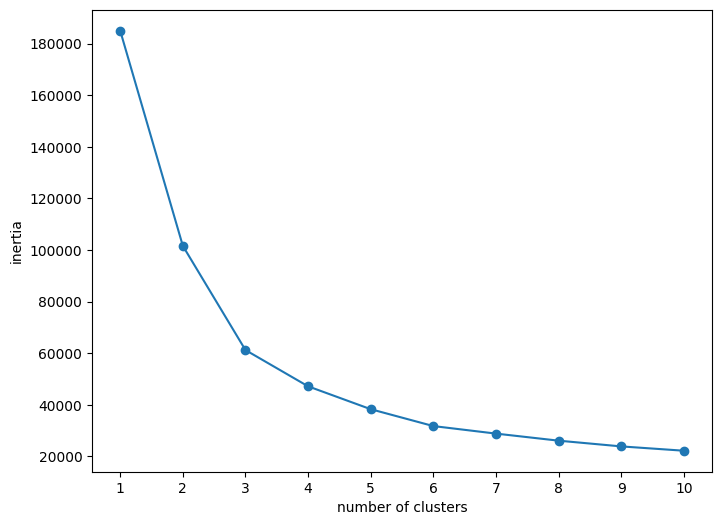

In [ ]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia,marker='o')
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('inertia')


In [ ]:
std=StandardScaler()
scaled_df=std.fit_transform(df)

kmeans=KMeans(n_clusters=5,random_state=42)
df['cluster']=kmeans.fit_predict(scaled_df)
df

,precipitation,temp_max,temp_min,wind,weather_factorized,cluster
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0,1
2012-01-02,10.9,10.6,2.8,4.5,1,1
2012-01-03,0.8,11.7,7.2,2.3,1,3
2012-01-04,20.3,12.2,5.6,4.7,1,4
2012-01-05,1.3,8.9,2.8,6.1,1,1
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,1,3
2015-12-28,1.5,5.0,1.7,1.3,1,3
2015-12-29,0.0,7.2,0.6,2.6,4,0


In [ ]:
x,y=df.drop('cluster',axis=1),df.cluster

In [ ]:
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }
grid_search = GridSearchCV(knn, param_grid, cv=5,verbose=3,n_jobs=1,scoring='accuracy')
grid_search.fit(X_train_temp, y_train_temp)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.937 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.937 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.902 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.907 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.887 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.937 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.946 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.902 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.902 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.902 tot

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
best_knn=grid_search.best_estimator_
best_knn.fit(X_train_temp, y_train_temp)
y_pred = best_knn.predict(X_val)
y_pred2=best_knn.predict(X_test)
print(f'accuracy score for val data and test data are:{accuracy_score(y_pred,y_val)} and {accuracy_score(y_pred2,y_test)} respectively')

accuracy score for val data and test data are:0.8995433789954338 and 0.9545454545454546 respectively


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,z_train)
z_pred=xgb.predict(x_test)
accuracy_score(z_test,z_pred)

0.8088737201365188

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform
from xgboost import XGBClassifier
model=XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=3, n_jobs=1, return_train_score=True)
search.fit(X_train_temp, y_train_temp)
# search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746;, score=(train=0.999, test=0.962) total time=   0.5s
[CV 2/3] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746;, score=(train=0.997, test=0.977) total time=   1.5s
[CV 3/3] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746;, score=(train=0.999, test=0.968) total time=   0.1s
[CV 1/3] END colsample_bytree=0.7467983561008608, gamma=0.02904180608409973, learning_rate=0.28985284373248055, max_depth=5, n_estimators=139, subsample=0.8832290311184181;, score=(train=1.000, test=0.950) total time=   0.1s
[CV 2/3] END colsample_bytree=0.74679835

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c1a774cdff0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c1a774cc6a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c1a774f1f00>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c1a774cf130>},
                   random_state=42, return_train_score=True, verbose=3)

In [ ]:
search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9519366578369711, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.43349688000576175,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15239534860945342,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=102, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# model=XGBClassifier(colsample_bytree= 0.7779849588562787,
#  gamma=0.22662042341441552,
#  learning_rate= 0.03969478533289514,
#  max_depth=2,
#  n_estimators= 132,
#  subsample=0.7644826883488745)
best_xg=search.best_estimator_
best_xg.fit(X_train_temp,y_train_temp)
y_pred=best_xg.predict(X_test)
y_pred2=best_xg.predict(X_val)
print(f'accuracy score for val data and test data are:{accuracy_score(y_pred,y_test)} and {accuracy_score(y_pred2,y_val)} respectively')

accuracy score for val data and test data are:0.9772727272727273 and 0.9726027397260274 respectively


In [ ]:
n=len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [ ]:
df['weather_factorized']=pd.factorize(df.weather)[0]
df.drop('weather',axis=1,inplace=True)
df

,precipitation,temp_max,temp_min,wind,weather_factorized
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0
2012-01-02,10.9,10.6,2.8,4.5,1
2012-01-03,0.8,11.7,7.2,2.3,1
2012-01-04,20.3,12.2,5.6,4.7,1
2012-01-05,1.3,8.9,2.8,6.1,1
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,1
2015-12-28,1.5,5.0,1.7,1.3,1
2015-12-29,0.0,7.2,0.6,2.6,4


In [ ]:
train_df_x=train_df.drop('weather_factorized',axis=1)
train_df_y=train_df.weather_factorized
val_df_x=val_df.drop('weather_factorized',axis=1)
val_df_y=val_df.weather_factorized
test_df_x=test_df.drop('weather_factorized',axis=1)
test_df_y=test_df.weather_factorized

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform
from xgboost import XGBClassifier

# model=XGBClassifier(objective='multi:softprob')
model=XGBClassifier()
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(train_df_x, train_df_y)
search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'colsample_bytree': 0.9040922615763338,
 'gamma': 0.2252496259847715,
 'learning_rate': 0.033979488347959955,
 'max_depth': 2,
 'n_estimators': 113,
 'subsample': 0.9233589392465844}

In [ ]:
from sklearn.metrics import accuracy_score
# model=XGBClassifier(colsample_bytree= 0.9040922615763338,
#  gamma=0.2252496259847715,
#  learning_rate= 0.033979488347959955,
#  max_depth=2,
#  n_estimators= 113,
#  subsample=0.9233589392465844)
model=XGBClassifier(colsample_bytree= 0.8123620356542087,
 gamma=0.4753571532049581,
 learning_rate= 0.24959818254342153,
 max_depth=2,
 n_estimators= 120,
 subsample=0.6624074561769746)

model.fit(train_df_x,train_df_y)
pred=model.predict(val_df_x)
accuracy_score(val_df_y,pred)
pred1=model.predict(test_df_x)
accuracy_score(test_df_y,pred1)
print(f"The validation score is {accuracy_score(val_df_y,pred)}")
print(f"The test score is {accuracy_score(test_df_y,pred1)}")

The validation score is 0.8595890410958904
The test score is 0.8163265306122449


The following will be an alternative method to split the data int train, validation and test data.


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('weather_factorized',axis=1)
y=df.weather_factorized
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# model=XGBClassifier(objective='multi:softprob')
model=XGBClassifier()
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=3, n_jobs=1, return_train_score=True)
search.fit(X_train_temp, y_train_temp)
search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746;, score=(train=0.896, test=0.836) total time=   0.1s
[CV 2/3] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746;, score=(train=0.909, test=0.848) total time=   0.1s
[CV 3/3] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746;, score=(train=0.891, test=0.865) total time=   0.1s
[CV 1/3] END colsample_bytree=0.7467983561008608, gamma=0.02904180608409973, learning_rate=0.28985284373248055, max_depth=5, n_estimators=139, subsample=0.8832290311184181;, score=(train=0.999, test=0.815) total time=   0.2s
[CV 2/3] END colsample_bytree=0.74679835

{'colsample_bytree': 0.7719362077472209,
 'gamma': 0.046936645040645875,
 'learning_rate': 0.08485979913219219,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.9819461122652776}

In [ ]:
model=XGBClassifier(colsample_bytree= 0.7719362077472209,
 gamma=0.046936645040645875,
 learning_rate= 0.08485979913219219,
 max_depth=2,
 n_estimators= 100,
 subsample=0.9819461122652776)

model.fit(X_train_temp,y_train_temp)
pred=model.predict(X_val)
accuracy_score(y_val,pred)
pred1=model.predict(X_test)
accuracy_score(y_test,pred1)
print(f"The validation score is {accuracy_score(y_val,pred)}")
print(f"The test score is {accuracy_score(y_test,pred1)}")

The validation score is 0.8538812785388128
The test score is 0.8363636363636363


This gives the inference that after using train test val split i am getting 83.63% accuracy.

DEEP LEARNING

---



In [ ]:
x_train_resized=np.resize(X_train_temp,(X_train_temp.shape[0],1,X_train_temp.shape[1]))
x_test_resized=np.resize(X_test,(X_test.shape[0],1,X_test.shape[1]))
x_val_resized=np.resize(X_val,(X_val.shape[0],1,X_val.shape[1]))

In [ ]:
df.weather_factorized.value_counts()

weather_factorized
1    641
2    640
4    101
0     53
3     26
Name: count, dtype: int64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather_factorized'], dtype='object')

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='tanh',return_sequences=True,input_shape=(1,len(df.columns)-1)))
model.add(LSTM(50,activation='tanh'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            42400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 72855 (284.59 KB)
Trainable params: 72855 (284.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early=EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
model_history=model.fit(x_train_resized,y_train_temp,epochs=100,validation_data=(x_val_resized,y_val),batch_size=64,callbacks=early)

Epoch 1/100
16/16 [==============================] - 8s 92ms/step - loss: 1.4358 - accuracy: 0.4687 - val_loss: 1.2649 - val_accuracy: 0.4566
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 1.1652 - accuracy: 0.5117 - val_loss: 1.0360 - val_accuracy: 0.5479
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.9527 - accuracy: 0.6771 - val_loss: 0.8176 - val_accuracy: 0.6667
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.7790 - accuracy: 0.7564 - val_loss: 0.6762 - val_accuracy: 0.7352
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6647 - accuracy: 0.7896 - val_loss: 0.6214 - val_accuracy: 0.7717
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5831 - accuracy: 0.8190 - val_loss: 0.5361 - val_accuracy: 0.8037
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5078 - accuracy: 0.8395 - val_loss: 0.4548 - val_accuracy: 0.8356
Epoch 8/100


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test_resized)
y_pred=np.argmax(y_pred,axis=1)
accuracy_score(y_test,y_pred)


7/7 [==============================] - 0s 5ms/step


0.9681818181818181

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

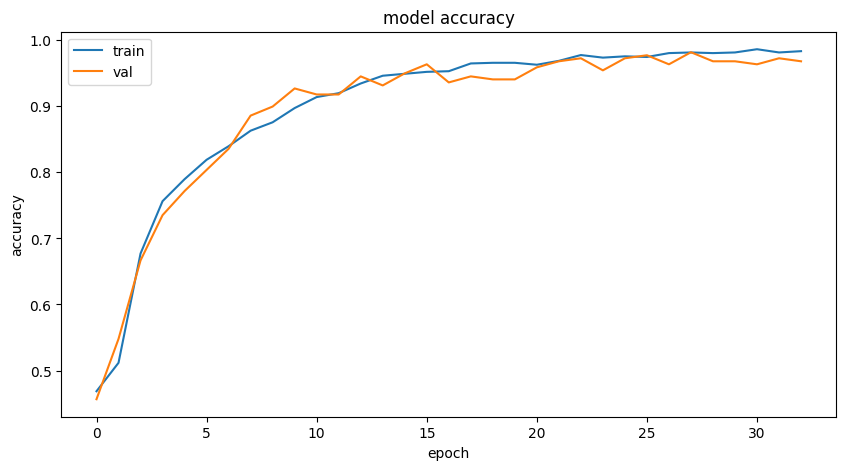

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')

Inference: Using Xgboost i was getting a testing accuracy of around 83% while the training accuracy was about 96% but after using lstm the testing accuracy got decreased to 80% while the training accuracy was around 85.87%  

After using Kmeans clustering and training the models on 'cluster' column, I was getting a 95%+ training, testing and validation accuracy  

What made the accuracy increase is the fact that we are prediciting which cluster the weather is going to fall under instead of actually predicting what type of weather it will be.